# Долгий расчет разные $\epsilon$

In [6]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import os
import subprocess

sys.path.append('/home/tpopova/prj/PB_SCF/08_2D_pore/py_files')
sys.path.append('/home/tpopova/prj/PB_SCF/01_dendrone_pore/py_files')

import config_loader
from out_reader import out_reader, get_profiles_by_y_or_x
from dendrons_pore import dendrons_pore

Параметры

In [3]:
N = 130
S = 100
D = 80
valence = -0.5

# Для 2D
L_pore = 160
space = 20
L_wall = 40

Cs = 0.001
chi_solv = 0.5
chi_surf = 0

eps_membrane = 5

In [4]:
N, n, theta, H_dendrons, r_in_dendrons, r_out_dendrons, psi_in_dendrons, psi_out_dendrons, c_pol_dendrons, _ = dendrons_pore(
    Cs = Cs,
    
    #параметры щетки
    alpha = abs(valence),
    S = S,
    
    #параметры поры
    D = D,
    N_opt = N,
    
)

print(N, H_dendrons)

130 [72.85131681]


In [5]:
# Загрузка конфигурации
config = config_loader.load_config()

# Обновление параметров конфигурации для текущего epsilon_surf
params_to_update = {
    "Cs": Cs,
    "D": D,
    "L_pore": L_pore,
    "L_wall": L_wall,
    "N": N,
    "S": S,
    "chi_solv": chi_solv,
    "chi_surf": chi_surf,
    "max_val": 0.1,
    "min_val": 0.1,
    "output_dir": f"2D_pore_in_files_eps_long",  # Уникальная папка для каждого epsilon
    "range_param": 'Cs',
    "space": space,
    "target_dir": "/home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates",
    "valence": valence,
    "epsilon_surf": eps_membrane  # Устанавливаем текущее значение epsilon
}

# Обновляем конфигурацию
for param, value in params_to_update.items():
    config = config_loader.update_config_param(config, param, value)

# Сохраняем обновленную конфигурацию
config_loader.save_config(config)

# # Получение данных
subprocess.check_call(['namics', os.path.abspath('/home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates/2D_pore_in_files_eps_long/2D_eps_5_Cs_0_0010_L160_0_L_wall_40_0_space_20_0_v_-0_50_D_80_N_130_theta_653_45.in')])

INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Обновление параметра Cs на 0.001
INFO:root:Обновление параметра D на 80
INFO:root:Обновление параметра L_pore на 160
INFO:root:Обновление параметра L_wall на 40
INFO:root:Обновление параметра N на 130
INFO:root:Обновление параметра S на 100
INFO:root:Обновление параметра chi_solv на 0.5
INFO:root:Обновление параметра chi_surf на 0
INFO:root:Обновление параметра max_val на 0.1
INFO:root:Обновление параметра min_val на 0.1
INFO:root:Обновление параметра output_dir на 2D_pore_in_files_eps_long
INFO:root:Обновление параметра range_param на Cs
INFO:root:Обновление параметра space на 20
INFO:root:Обновление параметра target_dir на /home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates
INFO:root:Обновление параметра valence на -0.5
INFO:root:Обновление параметра epsilon_surf на 5
INFO:root:Конфигурация успешно сохранена в /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 


KeyboardInterrupt: 

# График потенциала

<>:25: SyntaxWarning: invalid escape sequence '\ '
<>:25: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_3081320/2720550306.py:25: SyntaxWarning: invalid escape sequence '\ '
  plt.title("$Профили \ \\psi \ vs \ x \ для \ различных \ \\epsilon_{surf}$")


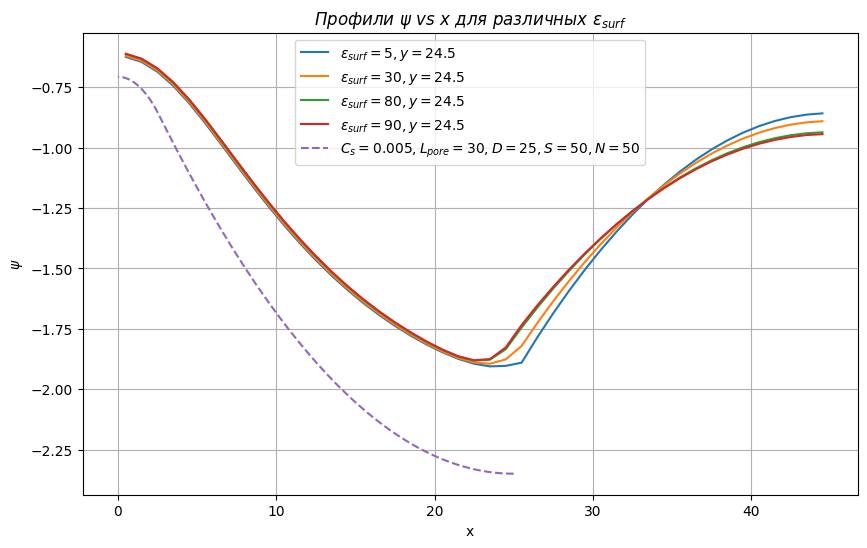

In [6]:
#  Доли от центра для y (например, центральная ось)
y_fraction = [0]  # 0 означает долю 0% от начала (центральная линия)

# Создаем график
plt.figure(figsize=(10, 6))

# Цикл по каждому значению epsilon_surf
for eps, psi_data in df_dict.items():

    # Получение профилей для выбранных y
    psi_nam = get_profiles_by_y_or_x(
        psi_data, y_fraction, profiles_name='sys_noname_psi', groupby='y', coord='x', use_fraction=True
    )

    # Построение графиков для psi
    for y_val, data in psi_nam.items():
        plt.plot(
            data['x'], data['sys_noname_psi'],
            label=f"$\\epsilon_{{surf}} = {eps}, y = {y_val}$"
        )
plt.plot(np.hstack((r_in_dendrons, r_out_dendrons)), np.hstack((psi_in_dendrons, psi_out_dendrons)), linestyle = '--', label = f'$C_s = {Cs}, L_{{pore}} = {L_pore}, D = {D}, S = {S}, N = {N}$')
# Настройки графика
plt.xlabel("x")
plt.ylabel("$\\psi$")
plt.title("$Профили \ \\psi \ vs \ x \ для \ различных \ \\epsilon_{surf}$")
plt.legend()
plt.grid(True)
plt.show()

# График плотности полимера

<>:25: SyntaxWarning: invalid escape sequence '\ '
<>:25: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_3081320/2590211333.py:25: SyntaxWarning: invalid escape sequence '\ '
  plt.title("$Профили \ \\phi \ vs \ x \ для \ различных \ \\epsilon_{surf}$")


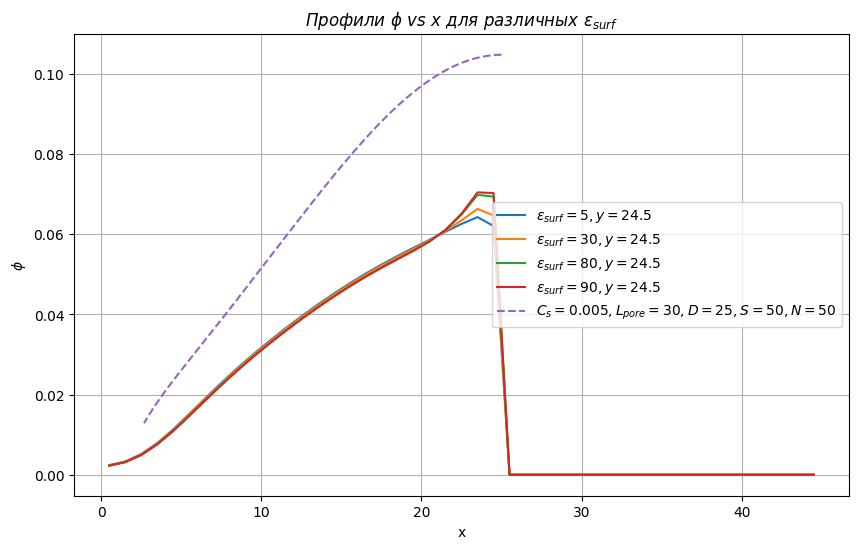

In [9]:
#  Доли от центра для y (например, центральная ось)
y_fraction = [0]  # 0 означает долю 0% от начала (центральная линия)

# Создаем график
plt.figure(figsize=(10, 6))

# Цикл по каждому значению epsilon_surf
for eps, phi_data in df_dict.items():

    # Получение профилей для выбранных y
    phi_nam = get_profiles_by_y_or_x(
        phi_data, y_fraction, profiles_name='combined_phi', groupby='y', coord='x', use_fraction=True
    )

    # Построение графиков для psi
    for y_val, data in phi_nam.items():
        plt.plot(
            data['x'], data['combined_phi'],
            label=f"$\\epsilon_{{surf}} = {eps}, y = {y_val}$"
        )
plt.plot(r_in_dendrons, c_pol_dendrons, linestyle = '--', label = f'$C_s = {Cs}, L_{{pore}} = {L_pore}, D = {D}, S = {S}, N = {N}$')
# Настройки графика
plt.xlabel("x")
plt.ylabel("$\\phi$")
plt.title("$Профили \ \\phi \ vs \ x \ для \ различных \ \\epsilon_{surf}$")
plt.legend()
plt.grid(True)
plt.show()